In [111]:
import numpy as np
import matplotlib.pyplot as plt
import scipy 

In [ ]:
mat = get_mat(dirx, diry, dirz)

pot = gp.NFWPotential(mass, rs, 1, 1, q, R=mat, units=units)

In [272]:
### What Sergey did ### 


from scipy.spatial.transform import Rotation

a,b,c = np.random.normal(0,1,size=3)
xx, yy = np.random.normal(0,1,size=2)


class get_mat:
    def __init__(self, a, b, c, aa, bb):

        self.v1 = np.array([0, 0, 1])

        v2 = np.array([a, b, c])
        self.v2 = v2 / np.sum(v2**2)**.5

        v3 = np.cross(self.v1, self.v2)
        self.v3 = v3 / np.sum(v3**2)**.5

        self.aa = aa
        self.bb = bb
    
    def orientation(self):
        
        angle = np.arccos(np.sum(self.v1 * self.v2))

        return Rotation.from_rotvec(angle * self.v3).as_matrix()
    
    def rotation(self):

        z_new = - (self.aa * self.v2[0] + self.bb * self.v2[1]) / self.v2[2]
        v_new = np.array([self.aa, self.bb, z_new])

        v_norm = v_new / np.sum(v_new**2)**.5

        new_angle = np.arccos(np.sum(v_norm*self.v3)) 

        return Rotation.from_rotvec(new_angle * self.v2).as_matrix()


In [273]:
rot_mat = get_mat(a,b,c,xx,yy)

In [274]:
rot_mat.orientation()

array([[ 0.82608487, -0.31326795, -0.46845169],
       [-0.31326795,  0.43572015, -0.84380753],
       [ 0.46845169,  0.84380753,  0.26180501]])

In [275]:
rot_mat.rotation()

0.9999999999999999
1.0000000000000002
0.9999999999999997
1


array([[ 0.20623023,  0.14020874, -0.96840622],
       [ 0.6637437 ,  0.70713476,  0.24373087],
       [ 0.7189669 , -0.6930382 ,  0.05276989]])

In [267]:
def get_mat(x, y, z):
    v1 = np.array([0, 0, 1])
    v2 = np.array([x, y, z])
    v2 = v2 / np.sum(v2**2)**.5
    angle = np.arccos(np.sum(v1 * v2))
    v3 = np.cross(v1, v2)
    v3 = v3 / np.sum(v3**2)**.5
    return Rotation.from_rotvec(angle * v3).as_matrix()

get_mat(a,b,c)

array([[ 0.98780986,  0.08222036, -0.13217977],
       [ 0.08222036,  0.44543805,  0.89152945],
       [ 0.13217977, -0.89152945,  0.43324791]])

In [252]:
get_mat_3D(1,1,1)

array([[ 0.78867513, -0.21132487,  0.57735027],
       [-0.21132487,  0.78867513,  0.57735027],
       [-0.57735027, -0.57735027,  0.57735027]])

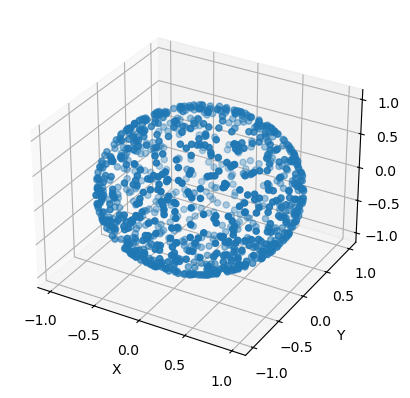

In [223]:
import numpy as np

def random_uniform_sphere(samples, radius=1):
    points = []
    for _ in range(samples):
        y = np.random.uniform(-1, 1)
        theta = np.random.uniform(0, 2 * np.pi)
        x = np.sqrt(1 - y**2) * np.cos(theta)
        z = np.sqrt(1 - y**2) * np.sin(theta)
        points.append((radius * x, radius * y, radius * z))
    return points

N = 1000
x, y, z = np.random.normal(0, 1, (3, N))
r = np.sqrt(x**2 + y**2 + z**2)
x, y, z = x/r, y/r, z/r

fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
ax.scatter(x,y,z)
ax.set_xlabel('X')
ax.set_ylabel('Y')
ax.set_zlabel('Z')
plt.show()


In [225]:
x_data = np.loadtxt('x_stream.txt')
y_data = np.loadtxt('y_stream.txt')

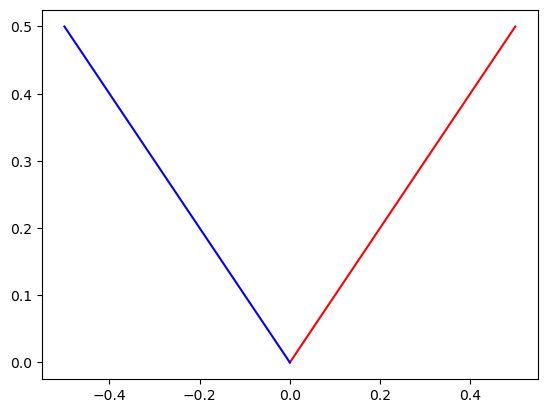

In [246]:
v1 = np.array([0.5, 0.5])
R  = np.array([[0, -1], [1, 0]])
v2 = R @ v1

plt.plot([0, v1[0]], [0, v1[1]], 'r')
plt.plot([0, v2[0]], [0, v2[1]], 'b')

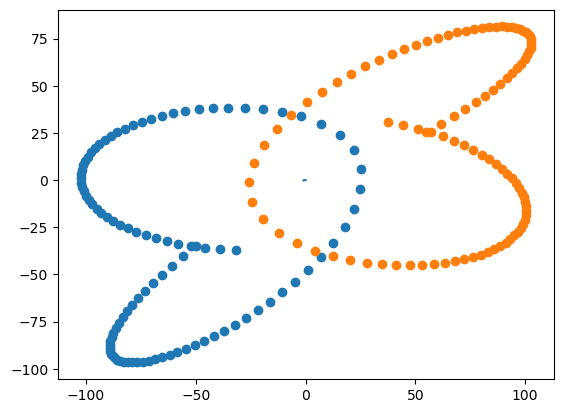

In [238]:
plt.scatter(x_data, y_data)
plt.plot([0,x[0]], [0,y[0]])
plt.scatter((R @ data)[0], (R @ data)[1])

In [244]:
np.linalg.norm( np.array([x[0],y[0]]) )

0.9943647430576127

In [245]:
np.linalg.norm( R @ np.array([x[0],y[0]]) )

0.9887612422360321

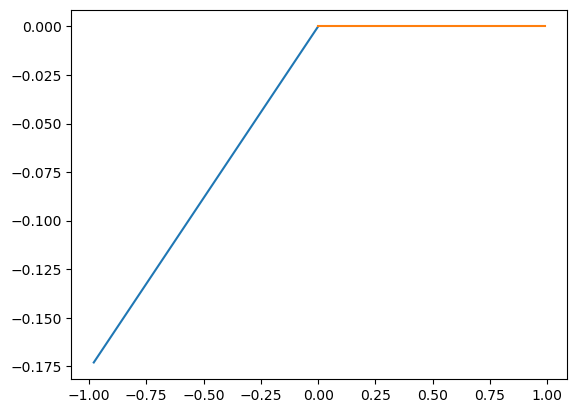

In [240]:
plt.plot([0,x[0]], [0,y[0]])
plt.plot([0,(R @ np.array([x[0],y[0]]))[0]],  [0,(R @ np.array([x[0],y[0]]))[1]])

In [227]:
data = np.array([x_data, y_data])

In [233]:
R = np.array([[x[0],y[0]], [-y[0], x[0]]])

In [236]:
R

array([[-0.97918947, -0.17305845],
       [ 0.17305845, -0.97918947]])

In [232]:
np.dot([1,1], [data]) * [1,0]

ValueError: operands could not be broadcast together with shapes (1,101) (2,) 

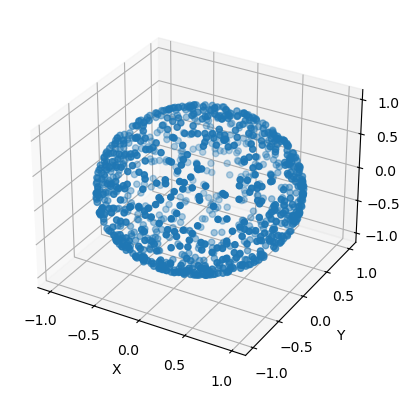

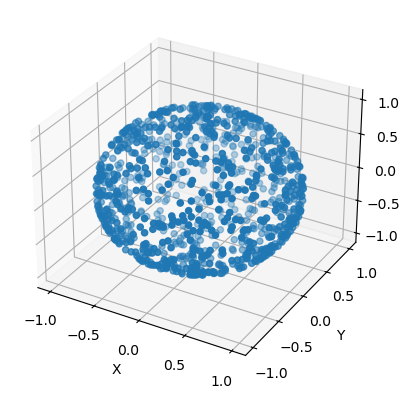

In [169]:
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

# def sample_unit_quaternion():
#     q = np.random.normal(0, 1, 4)
#     return q / np.linalg.norm(q)

def sample_unit_quaternion():

    # Truncated Normal
    m, s  = 0, 1  # mean and standard deviation
    low   = 0.  # lower  bounds
    low_n = (low - m) / s # standardize
    w  = scipy.stats.truncnorm.ppf(np.random.uniform(0, 1), low_n, np.inf, loc=m, scale=s)

    x = scipy.stats.norm.ppf(np.random.uniform(0, 1), loc=0, scale=1)
    y = scipy.stats.norm.ppf(np.random.uniform(0, 1), loc=0, scale=1)
    z = scipy.stats.norm.ppf(np.random.uniform(0, 1), loc=0, scale=1)

    q = np.array([w, x, y, z])


    # Normalize these values to create a unit quaternion
    q_normalized = q / np.linalg.norm(q)
    # Ensure the first component is non-negative
    return q_normalized


def quaternion_to_rotation_matrix(q):
    w, x, y, z = q
    return np.array([
        [1 - 2*y*y - 2*z*z,     2*x*y - 2*z*w,       2*x*z + 2*y*w],
        [2*x*y + 2*z*w,         1 - 2*x*x - 2*z*z,   2*y*z - 2*x*w],
        [2*x*z - 2*y*w,         2*y*z + 2*x*w,       1 - 2*x*x - 2*y*y]
    ])

# Apply rotation to a fixed vector
fixed_vector = np.array([1, 0, 0])
num_rotations = 1000
endpoints = np.zeros((3, num_rotations))

for i in range(num_rotations):
    quaternion = sample_unit_quaternion()
    rotation_matrix = quaternion_to_rotation_matrix(quaternion)
    rotated_vector = rotation_matrix @ fixed_vector
    endpoints[:, i] = rotated_vector

# Plotting
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
ax.scatter(endpoints[0, :], endpoints[1, :], endpoints[2, :])
ax.set_xlabel('X')
ax.set_ylabel('Y')
ax.set_zlabel('Z')
plt.show()


In [190]:
R @ fixed_vector

array([ 0.09170306,  0.61135371, -0.7860262 ])

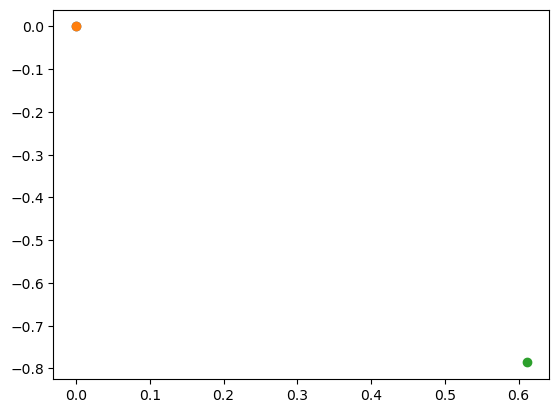

In [189]:
q = np.array([1,0.5,1,0.2])
normalized = q / np.linalg.norm(q)
R = quaternion_to_rotation_matrix(normalized)
rot_vector = R @ fixed_vector
plt.scatter(0,0)
plt.scatter(fixed_vector[1], fixed_vector[2])
plt.scatter(rot_vector[1], rot_vector[2])


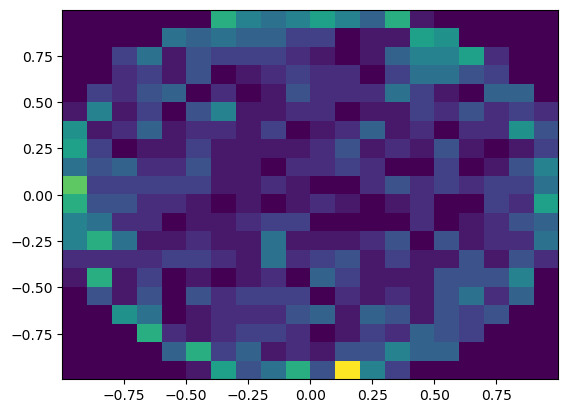

In [166]:
plt.hist2d(endpoints[1, :], endpoints[2, :], bins=20);

In [54]:
N = 1000
x_samples = np.random.uniform(-1, 1, N)
y_samples = np.random.uniform(-1, 1, N)

norm = np.sqrt(x_samples**2 + y_samples**2)
angle = np.random.uniform(0, 2*np.pi, N)

r_samples     = np.sqrt(x_samples**2 + y_samples**2)
theta_samples = np.arctan2(y_samples, x_samples)


(array([198.,  83.,  65.,  62.,  66.,  66.,  77.,  67.,  86., 230.]),
 array([-9.99999260e-01, -7.99999334e-01, -5.99999408e-01, -3.99999482e-01,
        -1.99999556e-01,  3.69752044e-07,  2.00000296e-01,  4.00000222e-01,
         6.00000148e-01,  8.00000074e-01,  1.00000000e+00]),
 <BarContainer object of 10 artists>)

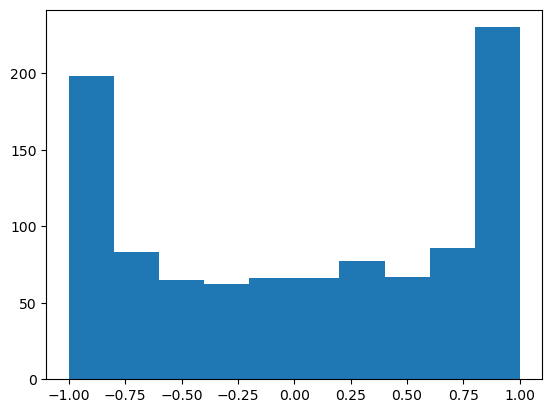

In [59]:
plt.hist(np.sin(angle))

Text(0, 0.5, 'theta')

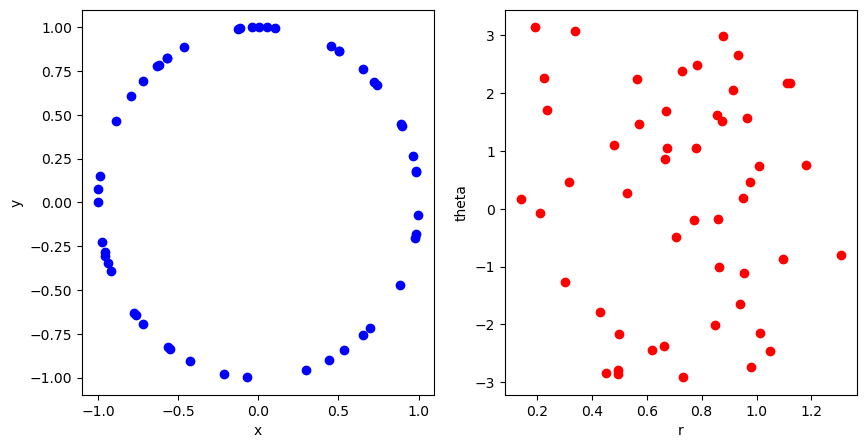

In [33]:
plt.figure(figsize=(10,5))
plt.subplot(1,2,1)
plt.scatter(x_samples/norm, y_samples/norm, c='b')
plt.xlabel('x')
plt.ylabel('y')
plt.subplot(1,2,2)
plt.scatter(r_samples, theta_samples, c='r')
plt.xlabel('r')
plt.ylabel('theta')